In [1]:
from model import *
import numpy as np
from util import *

import argparse

import torch
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import scipy
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.decomposition import PCA

In [2]:
def HGMM(n_class, dim, margin, shift = False):
    margin = margin
    mean = np.zeros((n_class , dim))
    #mean[:(n_class // 2), 0] = margin
    #mean[(n_class // 2):, 0] = -margin
    ratio = n_class // 2
    index = 0
    while ratio != 0:
        for i in range(int(n_class // ratio)):
            mean[i*ratio:(i+1)*ratio, index] = (-1) ** i * margin / (2**index)
        #for i in range(8):
            #mean[i*1:(i+1)*1, 2] = (-1) ** i * margin / 4
        ratio = ratio // 2
        index += 1
    if shift:
        '''
        for i in range(n_class):
            mean[i,i * 10:(i*10 + index)] = mean[i,:index]
            if i != 0:
                mean[i,:index] = 0
        '''
        mean[:n_class//2,index:index + index] = mean[:n_class//2,:index]
        mean[:n_class//2,:index] = 0
    return mean

def gen_synthetic(dim, margin, n_class, var, num =100, shift = False):
    mean = HGMM(n_class, dim, margin, shift)
    data = np.random.multivariate_normal(mean[0], np.identity(dim), num)
    cla = np.zeros(num)
    for i in range(1, n_class):
        cla = np.concatenate([cla, i*np.ones(num)])
        data = np.concatenate([data, np.random.multivariate_normal(mean[i], var * np.identity(dim), num)])
    print(data.shape)
    return data, cla
        
def create_data_loader(size = 400, n_class = 16, margin = 8, var = 1, dim = 100, num_per_class = 2000):
    num_batch = n_class * num_per_class // size
    synthetic_data, cla = gen_synthetic(dim, margin, n_class, var, num_per_class, True)
    train_loader = []
    perm = np.random.permutation(n_class * num_per_class)
    synthetic_data = synthetic_data[perm]
    cla = cla[perm]
    for i in range(size):    
        train_loader.append(torch.from_numpy(synthetic_data[i*num_batch:(i+1)*num_batch]).float())
    return train_loader, synthetic_data, cla

In [ ]:
N_CLASS = 8
MARGIN = 8
VAR = 1
DIM = 100
HID_DIM = 10
SUBSAMPLE_SIZE = 2048
N = 2000 # num per class


#generate synthetic data
train_loader, synthetic_data, cla = create_data_loader(800, N_CLASS,MARGIN,VAR,DIM,N)
# train VaDE
model = VaDE(N_CLASS, HID_DIM, DIM)
model.pre_train(train_loader,pre_epoch=50)
train(model, train_loader, 90)
#torch.save(model.state_dict(), "VaDE_parameters_C{}_M{}.pth".format(N_CLASS, MARGIN))
#model.load_state_dict(torch.load("VaDE_parameters_C{}_M{}.pth".format(args.n_class, args.margin)))

  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

(16000, 100)
Pretraining......


  2%|█▋                                                                                 | 1/50 [00:03<02:54,  3.55s/it]

L2=1.0407


  4%|███▎                                                                               | 2/50 [00:07<02:55,  3.66s/it]

L2=0.9522


  6%|████▉                                                                              | 3/50 [00:11<02:56,  3.77s/it]

L2=0.9336


  8%|██████▋                                                                            | 4/50 [00:15<02:56,  3.83s/it]

L2=0.9122


 10%|████████▎                                                                          | 5/50 [00:19<02:54,  3.88s/it]

L2=0.9014


 12%|█████████▉                                                                         | 6/50 [00:23<02:52,  3.91s/it]

L2=0.8977


 14%|███████████▌                                                                       | 7/50 [00:27<02:48,  3.91s/it]

L2=0.8946


 16%|█████████████▎                                                                     | 8/50 [00:31<02:44,  3.91s/it]

L2=0.8916


 18%|██████████████▉                                                                    | 9/50 [00:35<02:40,  3.91s/it]

L2=0.8883


 20%|████████████████▍                                                                 | 10/50 [00:39<02:35,  3.90s/it]

L2=0.8851


 22%|██████████████████                                                                | 11/50 [00:42<02:32,  3.90s/it]

L2=0.8821


 24%|███████████████████▋                                                              | 12/50 [00:46<02:27,  3.89s/it]

L2=0.8788


 26%|█████████████████████▎                                                            | 13/50 [00:50<02:23,  3.88s/it]

L2=0.8757


 28%|██████████████████████▉                                                           | 14/50 [00:54<02:20,  3.89s/it]

L2=0.8730


 30%|████████████████████████▌                                                         | 15/50 [00:58<02:15,  3.88s/it]

L2=0.8696


 32%|██████████████████████████▏                                                       | 16/50 [01:02<02:11,  3.86s/it]

L2=0.8666


 34%|███████████████████████████▉                                                      | 17/50 [01:06<02:06,  3.85s/it]

L2=0.8633


 36%|█████████████████████████████▌                                                    | 18/50 [01:09<02:03,  3.85s/it]

L2=0.8614


 38%|███████████████████████████████▏                                                  | 19/50 [01:13<01:59,  3.86s/it]

L2=0.8584


 40%|████████████████████████████████▊                                                 | 20/50 [01:17<01:55,  3.85s/it]

L2=0.8553


 42%|██████████████████████████████████▍                                               | 21/50 [01:21<01:51,  3.84s/it]

L2=0.8523


 44%|████████████████████████████████████                                              | 22/50 [01:25<01:47,  3.83s/it]

L2=0.8501


 46%|█████████████████████████████████████▋                                            | 23/50 [01:29<01:43,  3.83s/it]

L2=0.8474


 48%|███████████████████████████████████████▎                                          | 24/50 [01:32<01:39,  3.82s/it]

L2=0.8450


 50%|█████████████████████████████████████████                                         | 25/50 [01:36<01:35,  3.81s/it]

L2=0.8432


 52%|██████████████████████████████████████████▋                                       | 26/50 [01:40<01:31,  3.81s/it]

L2=0.8406


 54%|████████████████████████████████████████████▎                                     | 27/50 [01:44<01:27,  3.80s/it]

L2=0.8379


 56%|█████████████████████████████████████████████▉                                    | 28/50 [01:48<01:23,  3.79s/it]

L2=0.8355


 58%|███████████████████████████████████████████████▌                                  | 29/50 [01:51<01:19,  3.77s/it]

L2=0.8338


 60%|█████████████████████████████████████████████████▏                                | 30/50 [01:55<01:15,  3.77s/it]

L2=0.8314


 62%|██████████████████████████████████████████████████▊                               | 31/50 [01:59<01:11,  3.75s/it]

L2=0.8293


 64%|████████████████████████████████████████████████████▍                             | 32/50 [02:03<01:07,  3.76s/it]

L2=0.8267


 66%|██████████████████████████████████████████████████████                            | 33/50 [02:06<01:03,  3.74s/it]

L2=0.8250


 68%|███████████████████████████████████████████████████████▊                          | 34/50 [02:10<00:59,  3.69s/it]

L2=0.8232


 70%|█████████████████████████████████████████████████████████▍                        | 35/50 [02:13<00:54,  3.61s/it]

L2=0.8218


 72%|███████████████████████████████████████████████████████████                       | 36/50 [02:17<00:49,  3.53s/it]

L2=0.8206


 74%|████████████████████████████████████████████████████████████▋                     | 37/50 [02:20<00:45,  3.47s/it]

L2=0.8188


 76%|██████████████████████████████████████████████████████████████▎                   | 38/50 [02:23<00:41,  3.44s/it]

L2=0.8162


 78%|███████████████████████████████████████████████████████████████▉                  | 39/50 [02:27<00:37,  3.43s/it]

L2=0.8143


 80%|█████████████████████████████████████████████████████████████████▌                | 40/50 [02:30<00:34,  3.40s/it]

L2=0.8132


 82%|███████████████████████████████████████████████████████████████████▏              | 41/50 [02:33<00:30,  3.39s/it]

L2=0.8116


 84%|████████████████████████████████████████████████████████████████████▉             | 42/50 [02:37<00:27,  3.40s/it]

L2=0.8107


 86%|██████████████████████████████████████████████████████████████████████▌           | 43/50 [02:40<00:23,  3.40s/it]

L2=0.8090


 88%|████████████████████████████████████████████████████████████████████████▏         | 44/50 [02:44<00:20,  3.40s/it]

L2=0.8079


 90%|█████████████████████████████████████████████████████████████████████████▊        | 45/50 [02:47<00:16,  3.39s/it]

L2=0.8070


 92%|███████████████████████████████████████████████████████████████████████████▍      | 46/50 [02:50<00:13,  3.41s/it]

L2=0.8070


 94%|█████████████████████████████████████████████████████████████████████████████     | 47/50 [02:54<00:10,  3.43s/it]

L2=0.8044


 96%|██████████████████████████████████████████████████████████████████████████████▋   | 48/50 [02:57<00:06,  3.44s/it]

L2=0.8030


 98%|████████████████████████████████████████████████████████████████████████████████▎ | 49/50 [03:01<00:03,  3.45s/it]

L2=0.8008


100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [03:04<00:00,  3.70s/it]


L2=0.7993


  1%|▉                                                                                  | 1/90 [00:05<08:39,  5.84s/it]

127.41181560516357


  2%|█▊                                                                                 | 2/90 [00:11<08:36,  5.87s/it]

112.25049369812012


  3%|██▊                                                                                | 3/90 [00:17<08:30,  5.87s/it]

109.18216711997985


  4%|███▋                                                                               | 4/90 [00:23<08:27,  5.90s/it]

106.9782743549347


  6%|████▌                                                                              | 5/90 [00:29<08:30,  6.00s/it]

105.28342163085938


  7%|█████▌                                                                             | 6/90 [00:36<08:33,  6.11s/it]

103.95587453842163


  8%|██████▍                                                                            | 7/90 [00:42<08:21,  6.05s/it]

102.7733061695099


  9%|███████▍                                                                           | 8/90 [00:48<08:11,  6.00s/it]

101.8422574043274


 10%|████████▎                                                                          | 9/90 [00:53<08:02,  5.96s/it]

100.97398864746094


 11%|█████████                                                                         | 10/90 [00:59<07:57,  5.97s/it]

100.2807694530487


 12%|██████████                                                                        | 11/90 [01:06<07:56,  6.04s/it]

99.51721930503845


 13%|██████████▉                                                                       | 12/90 [01:11<07:46,  5.98s/it]

98.89594617843628


 14%|███████████▊                                                                      | 13/90 [01:17<07:40,  5.97s/it]

98.25447527885437


 16%|████████████▊                                                                     | 14/90 [01:23<07:32,  5.96s/it]

97.59355405807496


 17%|█████████████▋                                                                    | 15/90 [01:29<07:23,  5.91s/it]

97.06207958221435


 18%|██████████████▌                                                                   | 16/90 [01:35<07:17,  5.92s/it]

96.53955711364746


 19%|███████████████▍                                                                  | 17/90 [01:41<07:12,  5.92s/it]

96.01891610145569


In [36]:
train(model, train_loader, 30)
#torch.save(model.state_dict(), "VaDE_parameters_C{}_M{}.pth".format(N_CLASS, MARGIN))

  3%|██▊                                                                                | 1/30 [00:06<02:56,  6.07s/it]

89.66683934211731


  7%|█████▌                                                                             | 2/30 [00:12<02:49,  6.06s/it]

89.61324753761292


 10%|████████▎                                                                          | 3/30 [00:18<02:43,  6.07s/it]

89.5207427406311


 13%|███████████                                                                        | 4/30 [00:24<02:37,  6.05s/it]

89.51445689201356


 17%|█████████████▊                                                                     | 5/30 [00:30<02:31,  6.06s/it]

89.40330389022827


 20%|████████████████▌                                                                  | 6/30 [00:36<02:25,  6.05s/it]

89.34255153656005


 23%|███████████████████▎                                                               | 7/30 [00:42<02:19,  6.07s/it]

89.29237877845765


 27%|██████████████████████▏                                                            | 8/30 [00:48<02:13,  6.06s/it]

89.23383894920349


 30%|████████████████████████▉                                                          | 9/30 [00:54<02:07,  6.05s/it]

89.18272883415221


 33%|███████████████████████████▎                                                      | 10/30 [01:00<02:01,  6.08s/it]

89.17226202964783


 37%|██████████████████████████████                                                    | 11/30 [01:06<01:55,  6.07s/it]

89.02548873901367


 40%|████████████████████████████████▊                                                 | 12/30 [01:12<01:49,  6.06s/it]

89.01804560661316


 43%|███████████████████████████████████▌                                              | 13/30 [01:18<01:43,  6.07s/it]

88.9628671836853


 47%|██████████████████████████████████████▎                                           | 14/30 [01:24<01:37,  6.08s/it]

88.92233379364014


 50%|█████████████████████████████████████████                                         | 15/30 [01:31<01:31,  6.08s/it]

88.80876913070679


 53%|███████████████████████████████████████████▋                                      | 16/30 [01:36<01:24,  6.04s/it]

88.75789999961853


 57%|██████████████████████████████████████████████▍                                   | 17/30 [01:43<01:18,  6.06s/it]

88.70152525901794


 60%|█████████████████████████████████████████████████▏                                | 18/30 [01:48<01:11,  6.00s/it]

88.65641934394836


 63%|███████████████████████████████████████████████████▉                              | 19/30 [01:54<01:06,  6.00s/it]

88.60507822990418


 67%|██████████████████████████████████████████████████████▋                           | 20/30 [02:01<01:00,  6.02s/it]

88.51372489929199


 70%|█████████████████████████████████████████████████████████▍                        | 21/30 [02:07<00:54,  6.04s/it]

88.48021973609924


 73%|████████████████████████████████████████████████████████████▏                     | 22/30 [02:13<00:48,  6.02s/it]

88.44749753952027


 77%|██████████████████████████████████████████████████████████████▊                   | 23/30 [02:19<00:42,  6.06s/it]

88.36407077789306


 80%|█████████████████████████████████████████████████████████████████▌                | 24/30 [02:25<00:36,  6.06s/it]

88.33809440612794


 83%|████████████████████████████████████████████████████████████████████▎             | 25/30 [02:31<00:30,  6.03s/it]

88.2430047416687


 87%|███████████████████████████████████████████████████████████████████████           | 26/30 [02:37<00:24,  6.02s/it]

88.21463638305664


 90%|█████████████████████████████████████████████████████████████████████████▊        | 27/30 [02:43<00:18,  6.02s/it]

88.1480052947998


 93%|████████████████████████████████████████████████████████████████████████████▌     | 28/30 [02:49<00:12,  6.02s/it]

88.08725239753723


 97%|███████████████████████████████████████████████████████████████████████████████▎  | 29/30 [02:55<00:06,  6.06s/it]

88.05625749588013


100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [03:01<00:00,  6.05s/it]

88.00201375961304


In [64]:
subsample_index = np.arange(128)
for i in range(1, N_CLASS):
    subsample_index = np.concatenate([subsample_index, i * N + np.arange(128)])

mean, _ = model.encoder(torch.from_numpy(synthetic_data).float())
pca = PCA(n_components = HID_DIM)
projection = pca.fit_transform(synthetic_data)


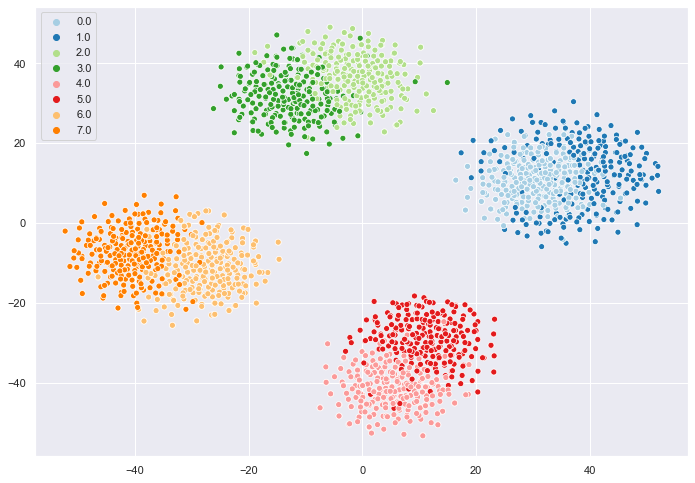

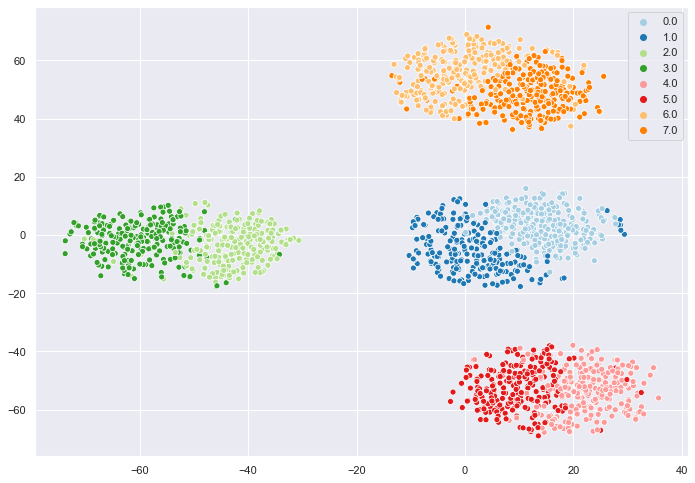

In [65]:
index = np.random.choice(np.arange(len(mean)), 2048)
Z = linkage(mean[index].detach(), "ward")

z = TSNE(n_components=2).fit_transform(synthetic_data[index])
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(z[:, 0], z[:, 1], hue = cla[index], palette=sns.color_palette("Paired", 8), legend = "full")
plt.show()

z = TSNE(n_components=2).fit_transform(mean[index].detach())
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(z[:, 0], z[:, 1], hue = cla[index], palette=sns.color_palette("Paired", 8), legend = "full")
plt.show()

In [66]:
pred = model.predict(torch.from_numpy(synthetic_data).float())
print(model.pi_)

Parameter containing:
tensor([ 1.1893e+01,  4.3876e+00,  1.2706e+01,  1.2704e+01, -2.4595e-03,
         1.1141e+01,  1.2295e+01,  9.6166e+00], requires_grad=True)


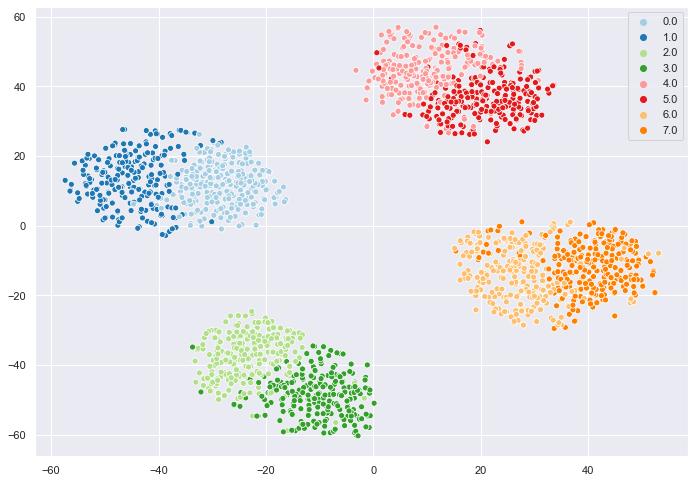

In [67]:
def transformation(model, data, rate = 2):
    mean, _ = model.encoder(torch.from_numpy(data).float())
    pred = model.predict(torch.from_numpy(data).float())
    cluster_means = model.mu_c[pred]
    scaled_cluster_means = cluster_means * rate
    scaled_mean = (mean - cluster_means) + scaled_cluster_means
    return scaled_mean.detach()

scaled_mean = transformation(model, synthetic_data[index])
z = TSNE(n_components=2).fit_transform(scaled_mean.detach())
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(z[:, 0], z[:, 1], hue = cla[index], palette=sns.color_palette("Paired", 8), legend = "full")

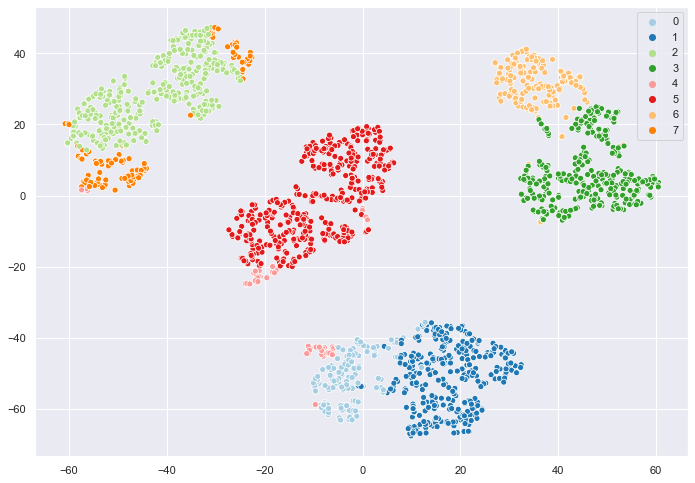

In [53]:
z = TSNE(n_components=2).fit_transform(mean[index].detach())
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(z[:, 0], z[:, 1], hue = pred[index], palette=sns.color_palette("Paired", 8), legend = "full")

In [ ]:
print("VaDE:", compute_purity_average(mean.detach().numpy(), cla, N_CLASS, 2048, 50, method = args.linkage_method))
print("PCA:", compute_purity_average(projection, cla, N_CLASS, 2048, 50, method = args.linkage_method))
print("Origin:", compute_purity_average(synthetic_data, cla, N_CLASS, 2048, 50, method = args.linkage_method))

print(compute_MW_objective_average(model, mean.detach().numpy(), cla, 2048, 50, method = args.linkage_method))
print(compute_MW_objective_average(model, projection, cla, 2048, 50, method = args.linkage_method))
print(compute_MW_objective_average(model, synthetic_data, cla, 2048, 50, method = args.linkage_method))

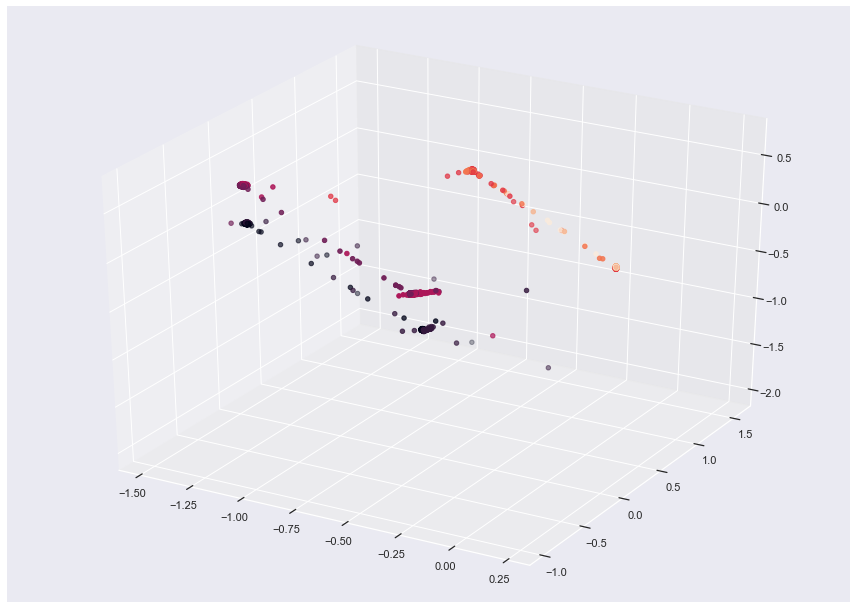

In [22]:
from mpl_toolkits.mplot3d import Axes3D

viz_mean = mean.detach().numpy()

fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(viz_mean[:, 0], viz_mean[:, 1], viz_mean[:,2], c = cla)
plt.show()

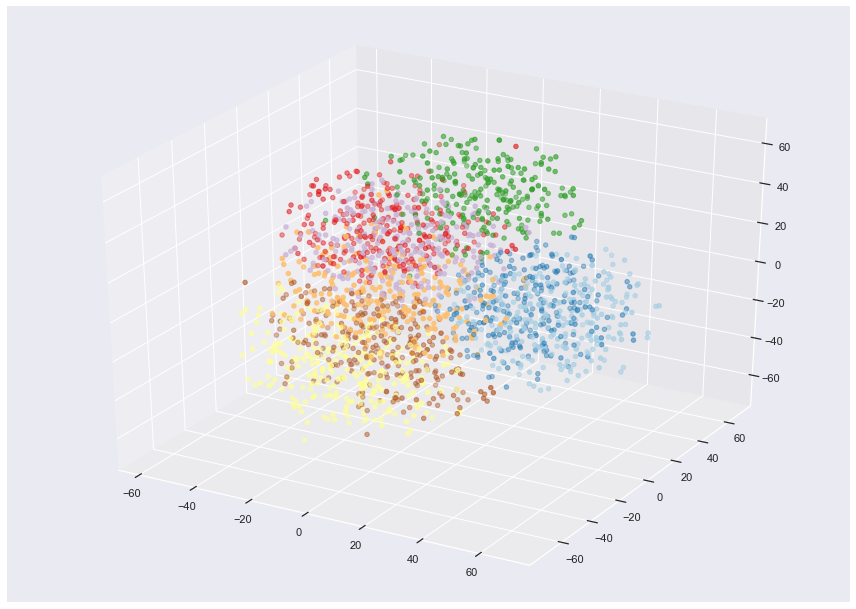

In [45]:
z = TSNE(n_components=3).fit_transform(synthetic_data[index])

fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(z[:, 0], z[:, 1], z[:,2], c = cla[index], cmap = "Paired")
plt.show()

In [63]:
N = 128
sum = 0
for i in range(6):
    sum += 2 ** i * (8 * N - N / (2**i)) * (N / (2**i) * (N/(2**i) - 1) /2)
sum = sum * 8
sum

117921792.0

In [57]:
test_cla = np.zeros(128)
for i in range(1, 8):
    test_cla = np.concatenate([test_cla, i * np.ones(128)])
test_cla

array([0., 0., 0., ..., 7., 7., 7.])

In [59]:
Z = linkage(test_cla.reshape(-1,1), "ward")
rootnode, nodelist = scipy.cluster.hierarchy.to_tree(Z, rd=True)
max = compute_objective_gt(1024, rootnode, test_cla)
max

60992512